In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import tarfile
from six.moves import urllib
#import pdb


In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


In [4]:
def fetch_housing_data(housing_url = HOUSING_URL , housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    print(housing_url)
    print(tgz_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [5]:
fetch_housing_data()

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
datasets/housing/housing.tgz


In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [7]:
housing = load_housing_data()

In [8]:
housing.head()
#house_data.info()
#type(house_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# calculate median on pandas dataframe - has inbuilt pandas method

#import numpy as np
#housing['longitude'].median() = np.median(housing['longitude'].values) = np.median(housing['longitude'])
#print('the np median is {}').format(np.median(housing['longitude']))
#a = 10
#print('the np median is {}'.format(np.median(housing['longitude'])))
#housing['longitude'].median
#np.median(housing['longitude'].values)
###  housing['longitude'].median() != housing['longitude'].median   ###
housing['longitude'].median()




-118.49

In [11]:
# vlue_counts counts unique categories and number of rows belonging to each
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
# .describe shows summary of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


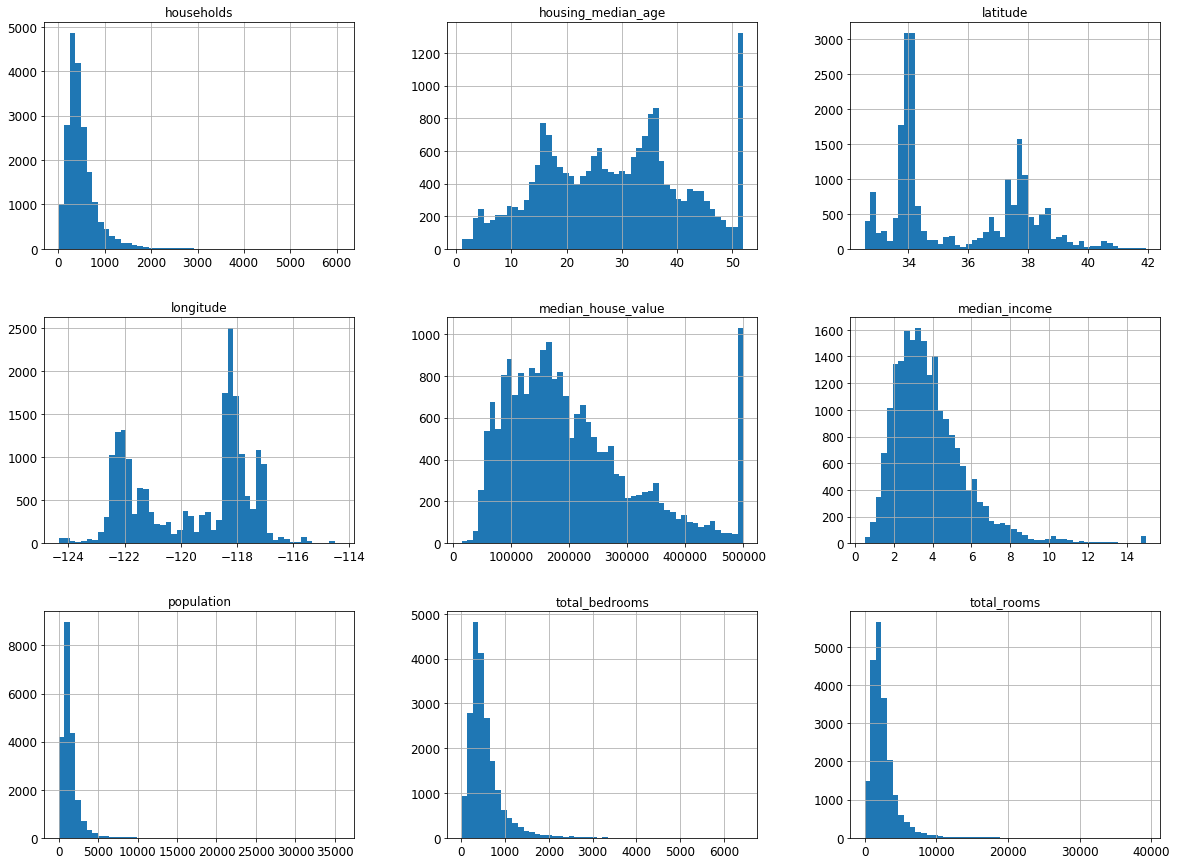

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()  # optional in jupyter - always shows by default

#can also use plt.hist(housing['longitude'], bins=50)
#plt.show()


In [14]:
#create test set
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 

In [15]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")
#check they're representative
#train_set.describe()
#test_set.describe()

16512 train + 4128 test


In [16]:
# can use train_test_split from sklearn instead
# can split mult datasets on same indices eg if sep df for labels

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

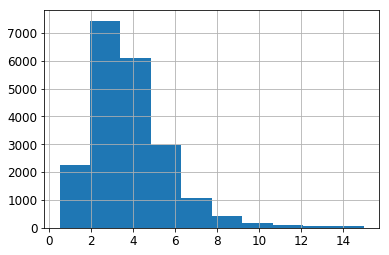

In [17]:
housing["median_income"].hist()

In [18]:
# want to do STRATIFIED SAMPLING
#     pop divided into homogenous subgroups - sample appropriately from each of them 
#     eg want to sample correct no from each income category ie most from ppl earning "3" and "2", then others

# make CATEGORICAL income category (change from numerical value)
# both do same thing
## Divide by 1.5 to limit the number of income categories
#housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
## Label those above 5 as 5
#housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])



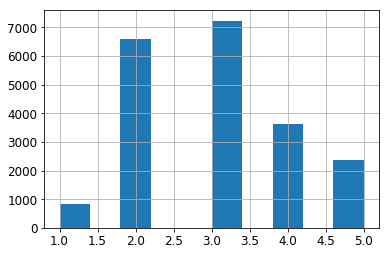

In [19]:
housing["income_cat"].hist()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#strat_test_set.hist()
#strat_train_set.hist()

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [22]:
#compare the sampling bias btwn random sampling and stratified sampling

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [23]:
compare_props


,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [24]:
#back to original set

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# dont fuck up data set

housing = strat_train_set.copy()

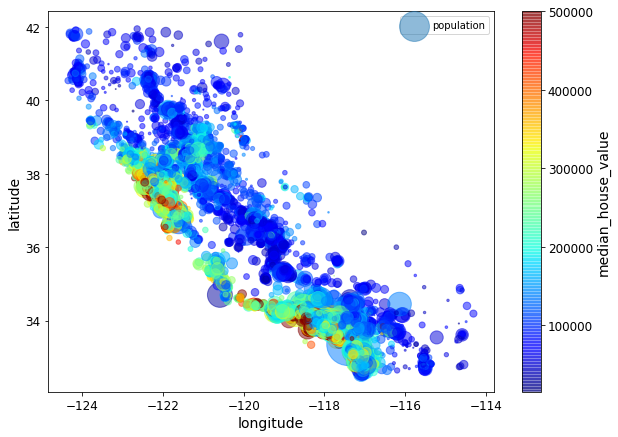

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=housing["population"]/20, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#The argument sharex=False fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.


In [26]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


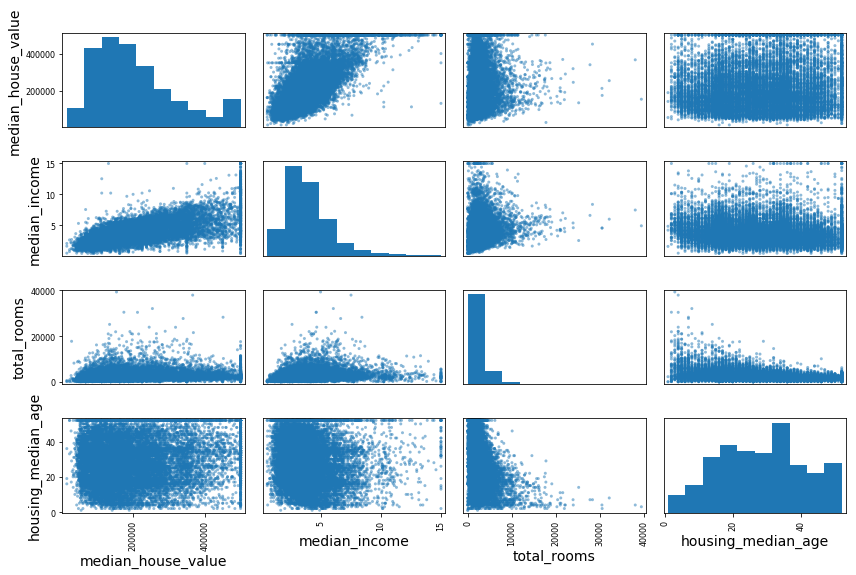

In [28]:
#from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


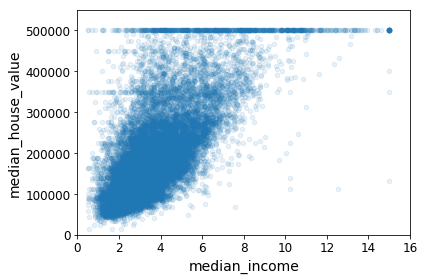

In [29]:
#these 2 correlated
# note lines at 500000, 450000, 350000,......- may want to trim data set to avoid reproducing these quirks

housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")


In [30]:

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]




In [31]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the data

In [32]:
# make clean copy of strat-train-set
# separate labels (median house value) from predictors (dont necessarily want to do same things to both)

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
#Warning: Since Scikit-Learn 0.20, the sklearn.preprocessing.Imputer class was replaced by the sklearn.impute.SimpleImputer class.

#instantiate imputer to fill values for you easily
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
        
imputer = SimpleImputer(strategy="median")


In [34]:
#only works on numerical values - get rid of ocean prox

housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])
#housing_num.head()

In [35]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
#Check that this is the same as manually computing the median of each attribute:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
# Transform the training set:
X = imputer.transform(housing_num)

# result = numpy array
# convert back to df
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [39]:
#Now let's preprocess the categorical input feature, ocean_proximity:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [40]:
# should work better, but unavailable for some reason
#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#housing_cat_encoded[:10]
# use LabelEncoder instead

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded # see values 

array([0, 0, 4, ..., 1, 0, 3])

In [41]:
# see what it has encoded them to
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [42]:
# not great bcos eg 1 more similar to 4 than 2 - algorithms likely assume nearby numbers similar to one another
# chnage to binary encoder - 1 if is thatattrribute, 0 otherwise -called OneHotEncoder
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
# By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed 
# by calling the toarray() method:

housing_cat_1hot.toarray()

# Alternatively, you can set sparse=False when creating the OneHotEncoder:
#cat_encoder = OneHotEncoder(sparse=False)
#housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
#housing_cat_1hot


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [44]:
# do it in one step using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# Custom Tansformers

In [45]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [46]:
# Let's create a custom transformer to add extra attributes:
# want to know eg how many rooms per house rather than just total rooms per district

from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

'''Alternatively, you can use Scikit-Learn's FunctionTransformer class that lets you easily create a transformer 
based on a transformation function (thanks to Hanmin Qin for suggesting this code). Note that we need to set 
validate=False because the data contains non-float values (validate will default to False in Scikit-Learn 0.22).
'''

#from sklearn.preprocessing import FunctionTransformer
#
#def add_extra_features(X, add_bedrooms_per_room=True):
 #   rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
  #  population_per_household = X[:, population_ix] / X[:, household_ix]
   # if add_bedrooms_per_room:
    #    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
     #   return np.c_[X, rooms_per_household, population_per_household,
      #               bedrooms_per_room]
    #else:
     #   return np.c_[X, rooms_per_household, population_per_household]

#attr_adder = FunctionTransformer(add_extra_features, validate=False,
 #                                kw_args={"add_bedrooms_per_room": False})
#housing_extra_attribs = attr_adder.fit_transform(housing.values)
#


"Alternatively, you can use Scikit-Learn's FunctionTransformer class that lets you easily create a transformer \nbased on a transformation function (thanks to Hanmin Qin for suggesting this code). Note that we need to set \nvalidate=False because the data contains non-float values (validate will default to False in Scikit-Learn 0.22).\n"

In [47]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)   #numerical attributes only! cant run imputer on categorical

In [49]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.61493744,
        -0.31205452, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  1.33645936,
         0.21768338, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.5320456 ,
        -0.46531516, -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.3167053 ,
         0.3469342 , -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.09812139,
         0.02499488,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.15779865,
        -0.22852947, -0.09586294]])

In [50]:
'''Warning: earlier versions of the book applied different transformations to different columns using a solution based 
on a DataFrameSelector transformer and a FeatureUnion (see below). It is now preferable to use the ColumnTransformer 
class that was introduced in Scikit-Learn 0.20. If you are using an older version of Scikit-Learn, you can import it 
from future_encoders.py:
'''

try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20
    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [51]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [52]:
#For reference, here is the old solution based on a DataFrameSelector transformer (to just select a subset of the 
#Pandas DataFrame columns), and a FeatureUnion:


from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# need to run diff pipeline on each - for categorical, needs transform to binary label, for numerical, needs imputation...
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features (again, we could use CombinedAttributesAdder() instead of FunctionTransformer(...) if we preferred):

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
#        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

#

from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

#

old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

#The result is the same as with the ColumnTransformer:
np.allclose(housing_prepared, old_housing_prepared)     # are they equal, element-wise (within some tolerance)


True

# Select and train a model

In [53]:
# housing_prepared is the result of running the data through the preparation pipeline
    # numpy array, 16512 rows of 15 cols; categorical vbls transformed to binary arrays, numerical vbls normalised,...
# housing_labels is the target variable - ie the house prices (interestingly, still of type:pandas.core.series.Series)

#create a linear regression model to predict the house prices
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [211888.26540421 321274.25149998 210853.46010112  62261.10820843
 194921.76527689]


In [55]:
# actual data
print("Labels:", list(some_labels))       # labels are the HOUSE PRICES ie the answer we are trying to predict

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [56]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.76054233838

In [57]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49872.99680535148

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [59]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [60]:
# zero error implies OVERFITTING
# dont test on test set until *confident* in your model - needs cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69587.06466755 69510.33708235 67412.3660069  71197.82053277
 71769.35191838 74352.81187418 72619.76666863 70377.23320538
 76100.95840992 68257.54762775]
Mean: 71118.52579938117
Standard deviation: 2556.771458996157


In [62]:
## can see scores are actually worse than lin regression model! 
## compute same for lin reg just to check

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67452.90032468 67232.2484863  68224.22888082 74716.58955656
 68420.26897488 71610.91469695 65201.58349349 68686.9304607
 72262.5140762  68112.28697795]
Mean: 69192.04659285196
Standard deviation: 2674.7305936361363


In [63]:
# try random forest regressor as well, hopefully better than these two crapshows
# instantiate and fit

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
#make predictions and measure how good they are w MSE

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21978.077494975852

In [65]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51220.66172313 49074.72676702 53534.6996853  55338.13665088
 49822.040647   56006.66222442 51165.24287027 50061.16009397
 54852.18293705 52610.39720702]
Mean: 52368.59108060574
Standard deviation: 2346.588124104154


In [66]:
# this seems to just be another way to look at the scores of a model

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()
# could also write this: pd.DataFrame(np.sqrt(-scores)).describe()

count       10.000000
mean     69192.046593
std       2819.413601
min      65201.583493
25%      67617.746988
50%      68322.248928
75%      70879.918638
max      74716.589557
dtype: float64

In [67]:
# looks like another model type (https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html)
# looks like you can do diff types of fit eg linear, poly...
# see https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111605.84056778249

In [72]:
# want to save all our models,inlcuding hyperparams and trained parameters, cross-val scores,... 
# can compare models

#from sklearn.externals import joblib

#joblib.dump(my_model, "my_model.pkl") # DIFF
#...
#my_model_loaded = joblib.load("my_model.pkl") # DIFF


# Fine tune your model

In [73]:
# now assume we have a short list of good models
# need to fine-tune them
# dont want to do manually - too long
# GridSearchCV evaluates all possible combinations of desired hyperparams, using cross validation
# below searches hyperparams for RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

# see pg73 for explanation

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [84]:
# The best hyperparameter combination found:
# note that these were the max param values included, so should expand search
    
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [85]:
# can also get best estimator directly
# note that max_features=6 & n_estimators=30,

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [86]:
# can also look at the score of each hyperparameter combination tested during the grid search:
# again can see bestresult for max_features=6 & n_estimators=30 (score = 49649.71941016075)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
# pd.DataFrame(grid_search.cv_results_)

65052.11484554499 {'max_features': 2, 'n_estimators': 3}
55368.13043043385 {'max_features': 2, 'n_estimators': 10}
52736.8766621369 {'max_features': 2, 'n_estimators': 30}
58640.40842527973 {'max_features': 4, 'n_estimators': 3}
52379.92747762705 {'max_features': 4, 'n_estimators': 10}
49903.91702394643 {'max_features': 4, 'n_estimators': 30}
58076.0608399897 {'max_features': 6, 'n_estimators': 3}
51649.61748594686 {'max_features': 6, 'n_estimators': 10}
49649.71941016075 {'max_features': 6, 'n_estimators': 30}
57463.51881474477 {'max_features': 8, 'n_estimators': 3}
51540.345516526846 {'max_features': 8, 'n_estimators': 10}
49776.78751833077 {'max_features': 8, 'n_estimators': 30}
62720.64961854877 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54536.61423536438 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60329.74197746971 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51883.762473279865 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

# Randomised search

In [100]:
# when n_hyperparams is large, better to do Randomsearch rather than manual
# randomly picks x iterations for each hyperparam

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97ec13b1d0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97ec0d9668>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [105]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48605.67062995733 {'max_features': 7, 'n_estimators': 436}
48644.57801742691 {'max_features': 5, 'n_estimators': 271}
50041.749246696425 {'max_features': 3, 'n_estimators': 72}
49795.71877227247 {'max_features': 5, 'n_estimators': 21}
48853.58929933428 {'max_features': 7, 'n_estimators': 122}
49832.282848772134 {'max_features': 3, 'n_estimators': 215}
49685.12620771753 {'max_features': 3, 'n_estimators': 459}
48869.50583223844 {'max_features': 5, 'n_estimators': 100}
49869.852075018585 {'max_features': 3, 'n_estimators': 150}
48628.7075244186 {'max_features': 5, 'n_estimators': 258}


In [98]:
#assess the importance of each *feature* for making accurate predictions

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.32506141e-02, 8.23530271e-02, 4.22097448e-02, 2.06186888e-02,
       1.83236013e-02, 1.88947217e-02, 1.74590214e-02, 3.50053899e-01,
       8.44059062e-02, 1.08317395e-01, 1.78159193e-02, 1.33113861e-01,
       6.03044512e-05, 6.10568685e-03, 7.01760938e-03])

In [99]:
# display the scores next to attribute names so we can see what's what

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)
# can see ocean_proximity category does not proivde useful info, except in <1H OCEAN case - could maybe drop the others

[(0.35005389947890464, 'median_income'),
 (0.13311386051304586, '<1H OCEAN'),
 (0.10831739469174168, 'pop_per_hhold'),
 (0.0932506140539984, 'longitude'),
 (0.08440590616587995, 'rooms_per_hhold'),
 (0.08235302705669943, 'latitude'),
 (0.042209744808093135, 'housing_median_age'),
 (0.020618688819341743, 'total_rooms'),
 (0.0188947216779291, 'population'),
 (0.018323601320081026, 'total_bedrooms'),
 (0.01781591930103145, 'bedrooms_per_room'),
 (0.017459021430683327, 'households'),
 (0.007017609383398327, 'NEAR BAY'),
 (0.006105686847950985, 'ISLAND'),
 (6.030445122099874e-05, 'INLAND')]

# FINAL MODEL!!!

In [111]:
# now we have our final model, it's time to evaluate it on the *test set*
# as before, get predictors and labels from testset
# prepare using pipeline 
#      ** use transform() NOT fit_transform **
# predict and evaluate

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [120]:
final_rmse

# note that performance usually worse than measd using cross val if you tuned your hyperparams, 
# bcos they were tuned to work well on your training set. dont retune again for your test set, 
# bcos unlikely to generalise well to another new set

46931.55775458549

In [126]:
# We can compute a 95% confidence interval for the test RMSE:

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))



array([44899.63996497, 48879.08098113])

In [127]:
#We could compute the interval manually like this:

tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(44899.63996497444, 48879.08098112736)

In [128]:
#Alternatively, we could use a z-scores rather than t-scores:

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(44900.24936180053, 48878.52119072412)